Except numeric data, we can also find useful insights from string data. Here I will draw the wordcloud based on the overviews of different neighbourhood group of Seattle to highlight each neighbourhood's characteristic.Travelers can choose living neighborhood based on their preference.

In [1]:
# import necessary libraries 
import numpy as np
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# import dataset
listing=pd.read_csv('listings.csv')

listing.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


We only need 2 columns: neighbourhood name and overview:

In [2]:
# select the only needed 2 columns
review=listing[['neighbourhood_group_cleansed','neighborhood_overview']]

In [3]:
# check nas
review.shape[0]-review.count()

neighbourhood_group_cleansed       0
neighborhood_overview           1032
dtype: int64

We notice there are about 1/3 of listings don't have neighborhood overview. It's difficult to replace the missing values, and making word cloud plot is like the explore data analysis, so we just simply drop the records having NAs in neighborhood overview. 

In [8]:
# drop those rows that don't have neighborhood overview
review=review.dropna(subset=['neighborhood_overview'])

Let's check how many neighborhood groups and how many listings belong to each group:

In [9]:
review['neighbourhood_group_cleansed'].value_counts()

Other neighborhoods    617
Capitol Hill           396
Downtown               343
Central Area           276
Queen Anne             213
Ballard                179
West Seattle           150
Rainier Valley         123
University District     89
Beacon Hill             82
Delridge                64
Northgate               58
Cascade                 56
Lake City               47
Magnolia                45
Seward Park             38
Interbay                10
Name: neighbourhood_group_cleansed, dtype: int64

Other neighborhoods don't refer to a specific neighborhood. Here we won't draw the word cloud for it. First, we will plot a word cloud for Capitol Hill area

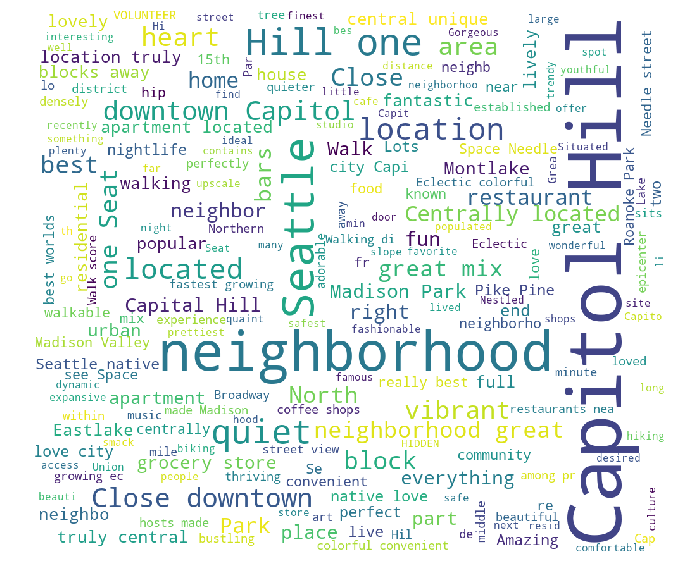

In [5]:
# plot word cloud of Capitol_Hill neighbourhood
Capitol_Hill=review[review['neighbourhood_group_cleansed']=='Capitol Hill']['neighborhood_overview']
plt.subplots(figsize = (15, 10))
wordcloud = WordCloud(background_color="white",width=1000, height=860, margin=2).generate(Capitol_Hill.to_string())
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In this wordcloud, the most frequent words like capitol hill, neighborhood, Seattle don't seem very insightful. Let's remove these 'stop' words then make a new word cloud.

In [31]:
# remove stop words
Capitol_Hill2=Capitol_Hill.str.replace('Capitol Hill','')
Capitol_Hill2=Capitol_Hill2.str.replace('Seattle','')
Capitol_Hill2=Capitol_Hill2.str.replace('neighborhood','')
Capitol_Hill2=Capitol_Hill2.str.replace('location','')
Capitol_Hill2=Capitol_Hill2.str.replace('located','')

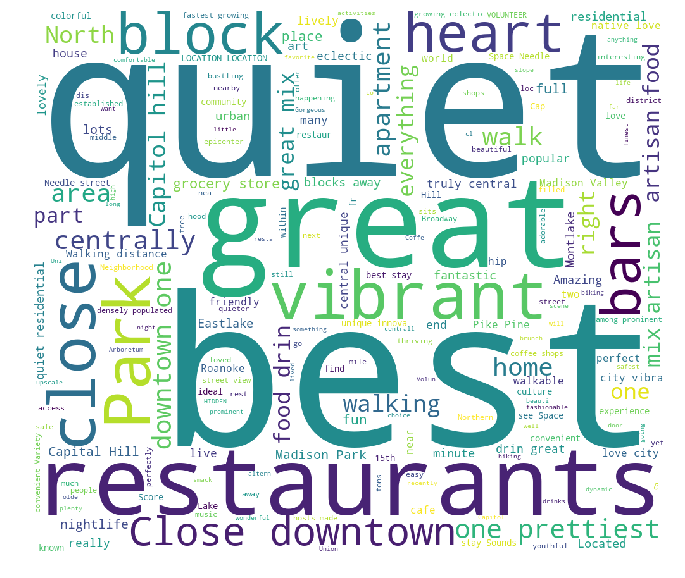

In [32]:
# replot word cloud of Capitol_Hill neighbourhood
plt.subplots(figsize = (15, 10))
wordcloud = WordCloud(background_color="white",width=1000, height=860, margin=2).generate(Capitol_Hill2.to_string())
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

Now looks like key words for Capitol hill include quient, vibrant, restaurants and park.

In [11]:
# define a function that can plot word cloud for different neighborhood

def wordcloud_neighborhood(neighborhood_name):
    '''
    Function that draw a word cloud plot of a specific neighborhood's overview
    Args:
        neighborhood_name: name of the specific neighborhood
    ''' 
    
    #filter reviews that belong to the specific neighborhood
    neighborhood=review[review['neighbourhood_group_cleansed']==neighborhood_name]['neighborhood_overview']
    neighborhood=neighborhood.str.lower()
    
    #remove stop words
    neighborhood2=neighborhood.str.replace(neighborhood_name.lower(),'')
    neighborhood2=neighborhood2.str.replace('seattle','')
    neighborhood2=neighborhood2.str.replace('neighborhood','')
    neighborhood2=neighborhood2.str.replace('location','')
    neighborhood2=neighborhood2.str.replace('located','')
    
    # plot the wordcloud
    plt.subplots(figsize = (15, 10))
    wordcloud = WordCloud(background_color="white",width=1000, height=860, margin=2).generate(neighborhood2.to_string())
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

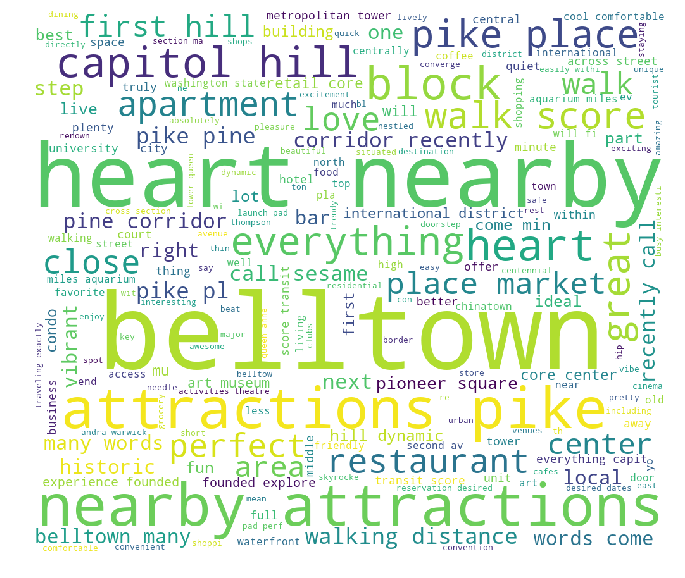

In [12]:
# plot word cloud of Downtown neighbourhood
wordcloud_neighborhood('Downtown')

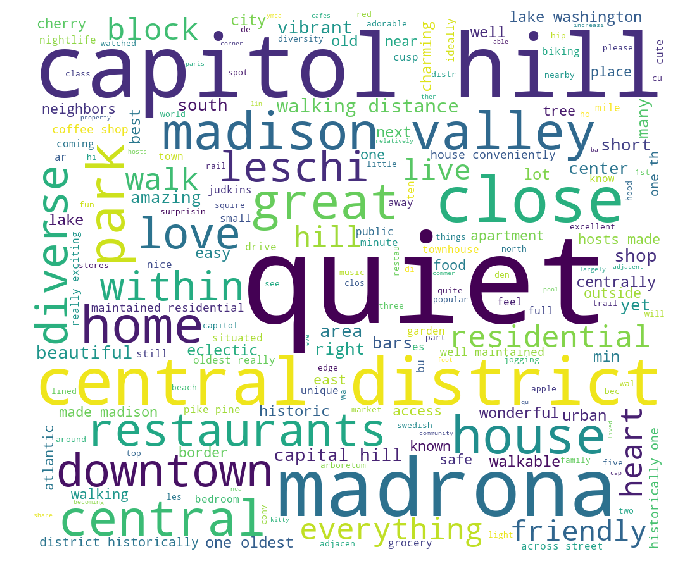

In [14]:
# plot word cloud of Central Area neighbourhood
wordcloud_neighborhood('Central Area')

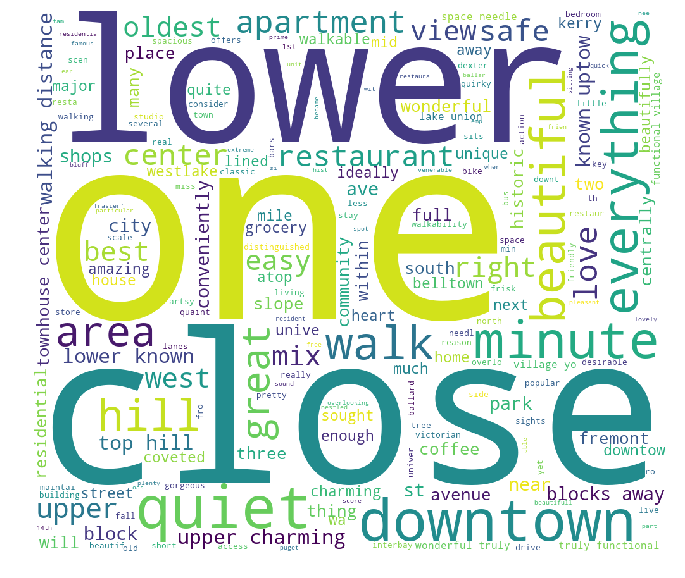

In [16]:
# plot word cloud of Queen Anne neighbourhood
wordcloud_neighborhood('Queen Anne')

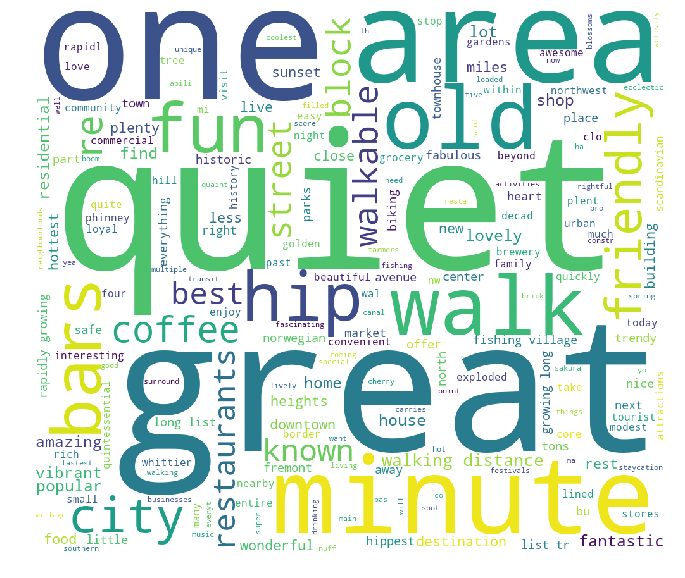

In [17]:
# plot word cloud of Ballard neighbourhood
wordcloud_neighborhood('Ballard')

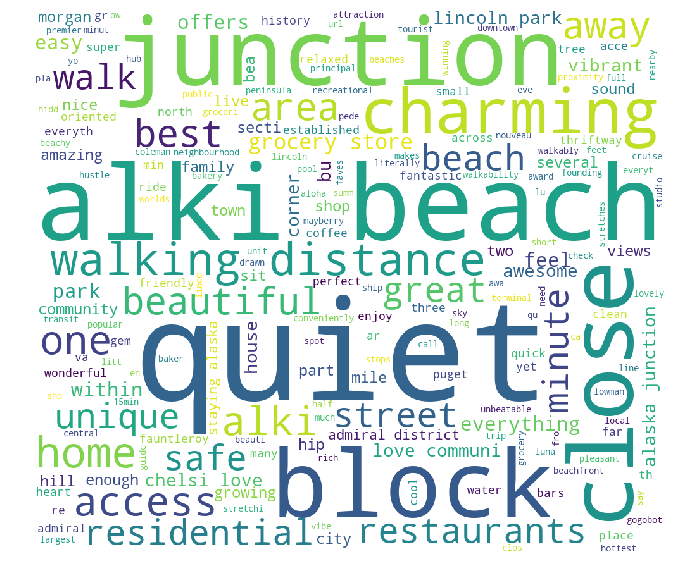

In [18]:
# plot word cloud of West Seattle neighbourhood
wordcloud_neighborhood('West Seattle')

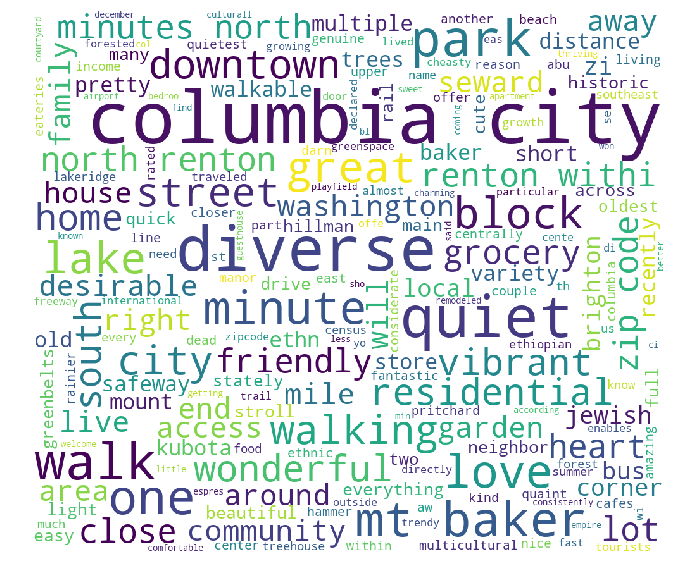

In [19]:
# plot word cloud of Rainier Valley neighbourhood
wordcloud_neighborhood('Rainier Valley')